# Convolutinal Neural Networks (CNNs) and LSTMs
BITS F464 Assignment 5

### Hand gesture recognition using Convolutional Neural Network (CNN)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
df=pd.read_csv('./data/sign_mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [22]:
df.shape

(27455, 785)

In [23]:
df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

#### Modelling the CNN

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.28))

model.add(Dense(26, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/Users/zoddtheimmortal/root/CC++/projects/ml-assignments/a5/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

#### Train & Compile Model

In [27]:
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1793 - loss: 4.3971 - val_accuracy: 0.8942 - val_loss: 0.3686
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8414 - loss: 0.4689 - val_accuracy: 0.9914 - val_loss: 0.0399
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9382 - loss: 0.1813 - val_accuracy: 0.9949 - val_loss: 0.0239
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9640 - loss: 0.1073 - val_accuracy: 0.9945 - val_loss: 0.0184
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9701 - loss: 0.0853 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9766 - loss: 0.0738 - val_accuracy: 0.9958 - val_loss: 0.0150
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9775 - loss: 0.0661 - val_accuracy: 0.9982 - val_loss: 0.0083
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9850 - loss: 0.0496 - val_accuracy: 0.

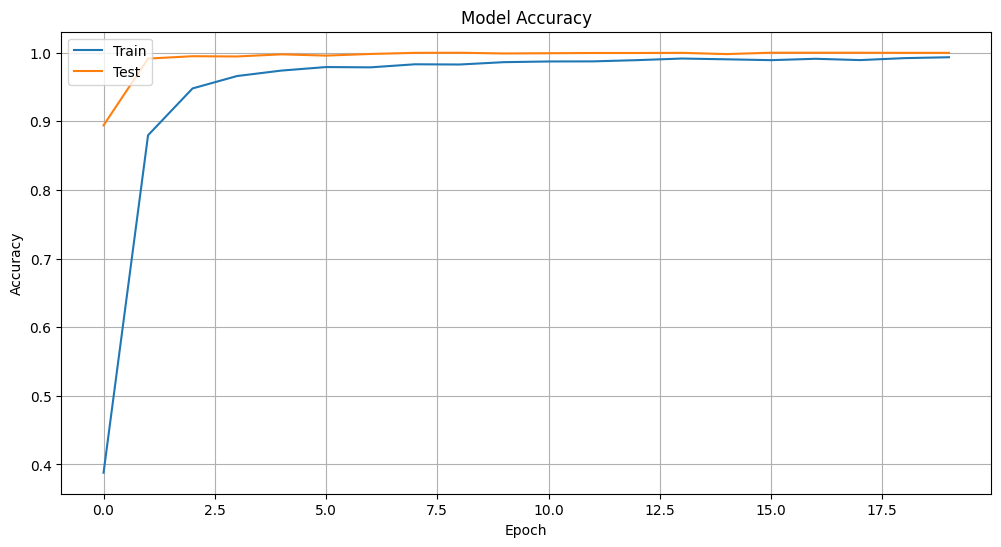

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

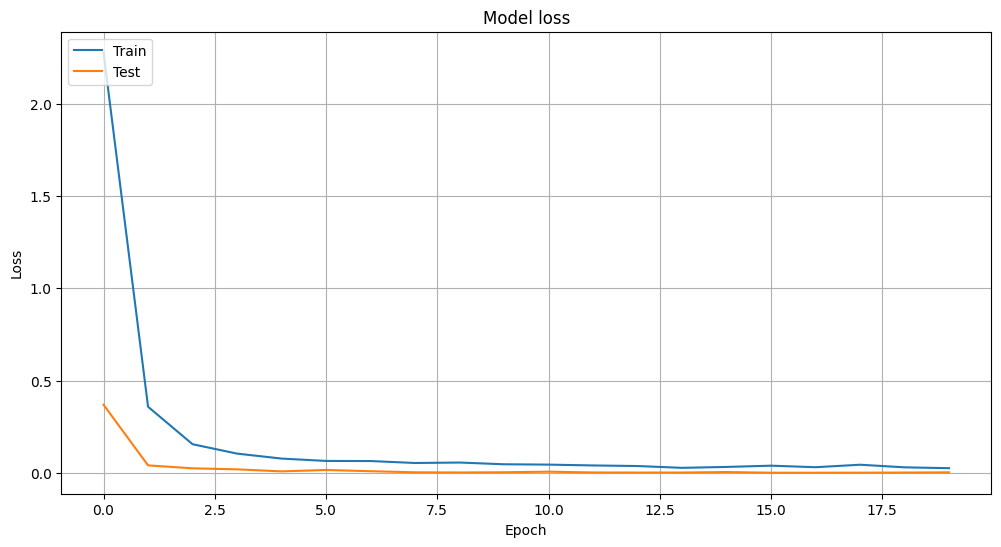

In [31]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()